In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

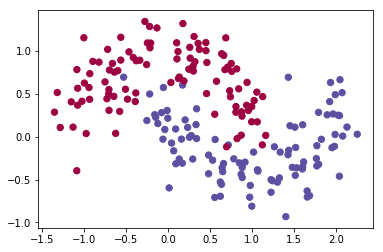

In [26]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [5]:
#First we train a linear classifier, Logistic regression classifier
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [6]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5,1,'Logistic Regression')

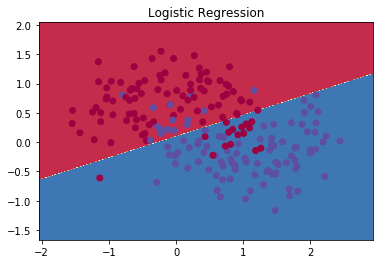

In [7]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [8]:
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [10]:
#NN
num_examples = len(X)
nn_input_dim = 2 
nn_output_dim = 2

#gradient descent
epsilon = 0.01 #learning rate
reg_lambda = 0.01 #regularization

In [17]:
#loss function
def loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    #feedforward
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    
    z2 = a1.dot(W2) + b2    
    expos = np.exp(z2)
    probab = expos/np.sum(expos, axis = 1, keepdims = True)
    
    #loss
    log_probabs = -np.log(probab[range(num_examples), y])
    data_loss = np.sum(log_probabs)
    
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    
    return 1./num_examples * data_loss

In [23]:
#predict function
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    #feedforward
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    
    z2 = a1.dot(W2) + b2
    expos = np.tanh(z2)
    probs = expos / np.sum(expos, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [24]:
#backprop function
print(range(5))
def train_model(num_hidden, print_loss = False, passes = 20000):
    
    #initialises parameters
    np.random.seed(7)
    W1 = np.random.randn(nn_input_dim, num_hidden) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, num_hidden))
    W2 = np.random.randn(num_hidden, nn_output_dim) / np.sqrt(num_hidden)
    b2 = np.zeros((1, nn_output_dim))
    
    model = {}
    
    
    for i in range(0, passes):
        
        #feedforward
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        
        z2 = a1.dot(W2) + b2
        expos = np.exp(z2)
        probabs = expos / np.sum(expos, axis=1, keepdims=True)
        
        #backprop
        delta3 = probabs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        #regularization
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        #parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, loss(model)))
    
    return model

[0, 1, 2, 3, 4]


Loss after iteration 0: 0.690928
Loss after iteration 1000: 0.068942
Loss after iteration 2000: 0.069643
Loss after iteration 3000: 0.071226
Loss after iteration 4000: 0.071260
Loss after iteration 5000: 0.071284
Loss after iteration 6000: 0.071298
Loss after iteration 7000: 0.071306
Loss after iteration 8000: 0.071311
Loss after iteration 9000: 0.071314
Loss after iteration 10000: 0.071315
Loss after iteration 11000: 0.071316
Loss after iteration 12000: 0.071317
Loss after iteration 13000: 0.071317
Loss after iteration 14000: 0.071317
Loss after iteration 15000: 0.071317
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


Text(0.5,1,'Decision Boundary for hidden layer size 3')

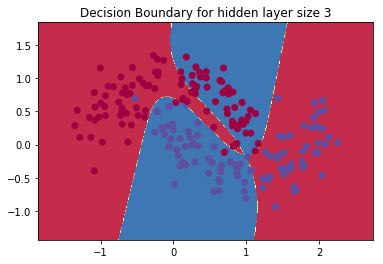

In [27]:
#building a model
model = train_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")